### **Project:** Analyzing COVID-19 Vaccination Trends (Updated Quarterly)


*Objectives:*

    - Explore global vaccination trends using Pandas.

    - Visualize quarterly vaccination progress using Matplotlib.

    - Compare vaccination rates across countries.

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load the Vaccination Data

In [2]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Srayoshi-Mirza/Analyzing-COVID-19-Vaccination-Trends-Updated-Quarterly-/refs/heads/main/vaccination-data.csv")  # Update with actual file path

# Display first few rows
df.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,2023-12-29,217124.0,90493.0,203.0,85.0,84363.0,79.0,NaN,2021-02-17,NaN,35659.0,33.0
1,Afghanistan,AFG,EMRO,REPORTING,2023-12-31,22964750.0,19151369.0,59.0,49.0,18370386.0,47.0,NaN,2021-02-22,NaN,2729940.0,7.0
2,Angola,AGO,AFRO,REPORTING,2023-12-31,27819132.0,16550642.0,85.0,50.0,9609080.0,29.0,NaN,2021-03-10,NaN,3067091.0,9.0
3,Anguilla,AIA,AMRO,REPORTING,2023-12-29,24864.0,10858.0,166.0,72.0,10382.0,69.0,NaN,2021-02-05,NaN,3231.0,22.0
4,Albania,ALB,EURO,REPORTING,2023-12-23,3088966.0,1349255.0,107.0,47.0,1279333.0,44.0,NaN,2021-01-13,NaN,402371.0,14.0


In [4]:
# Load the new vaccine introduction dataset
vaccine_intro_df = pd.read_csv("https://raw.githubusercontent.com/Srayoshi-Mirza/Analyzing-COVID-19-Vaccination-Trends-Updated-Quarterly-/refs/heads/main/vaccination-metadata.csv")  # Update with the correct file path

# Display first few rows
vaccine_intro_df.head()

,ISO3,PRODUCT_NAME,VACCINE_NAME,COMPANY_NAME,AUTHORIZATION_DATE,START_DATE,END_DATE,COMMENT,DATA_SOURCE,Unnamed: 9,WHO_REGION
0,ABW,Comirnaty,Pfizer BioNTech - Comirnaty,Pfizer BioNTech,NaN,NaN,NaN,NaN,REPORTING,NaN,AMRO
1,ABW,Ad26.COV 2-S,Janssen - Ad26.COV 2-S,Janssen Pharmaceuticals,NaN,NaN,NaN,NaN,REPORTING,NaN,AMRO
2,AFG,Gam-Covid-Vac,Gamaleya - Gam-Covid-Vac,Gamaleya Research Institute,NaN,NaN,NaN,NaN,REPORTING,NaN,EMRO
3,AFG,BBIBP-CorV,Beijing CNBG - BBIBP-CorV,Beijing Bio-Institute Biological Products (CNBG),NaN,NaN,NaN,NaN,REPORTING,NaN,EMRO
4,AFG,Vaxzevria,AstraZeneca - Vaxzevria,AstraZeneca,NaN,NaN,NaN,NaN,REPORTING,NaN,EMRO


Data Preprocessing

In [5]:
# Convert 'DATE_UPDATED' to datetime format
df['DATE_UPDATED'] = pd.to_datetime(df['DATE_UPDATED'], errors='coerce')

# Drop rows with missing dates
df = df.dropna(subset=['DATE_UPDATED'])

# Fill missing numeric values with 0
num_cols = ['TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
            'PERSONS_LAST_DOSE', 'PERSONS_BOOSTER_ADD_DOSE']
df[num_cols] = df[num_cols].fillna(0)

# Fill missing categorical values with 'Unknown'
cat_cols = ['VACCINES_USED', 'WHO_REGION']
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Display first few rows
df.head()

<ipython-input-5-5483389552c7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna(0)
<ipython-input-5-5483389552c7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = df[cat_cols].fillna("Unknown")


,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,2023-12-29,217124.0,90493.0,203.0,85.0,84363.0,79.0,Unknown,2021-02-17,NaN,35659.0,33.0
1,Afghanistan,AFG,EMRO,REPORTING,2023-12-31,22964750.0,19151369.0,59.0,49.0,18370386.0,47.0,Unknown,2021-02-22,NaN,2729940.0,7.0
2,Angola,AGO,AFRO,REPORTING,2023-12-31,27819132.0,16550642.0,85.0,50.0,9609080.0,29.0,Unknown,2021-03-10,NaN,3067091.0,9.0
3,Anguilla,AIA,AMRO,REPORTING,2023-12-29,24864.0,10858.0,166.0,72.0,10382.0,69.0,Unknown,2021-02-05,NaN,3231.0,22.0
4,Albania,ALB,EURO,REPORTING,2023-12-23,3088966.0,1349255.0,107.0,47.0,1279333.0,44.0,Unknown,2021-01-13,NaN,402371.0,14.0


 Aggregate Data Quarterly

In [6]:
# Set 'DATE_UPDATED' as index
df.set_index('DATE_UPDATED', inplace=True)

# Aggregate quarterly data
quarterly_data = df.resample('QE').sum(numeric_only=True).reset_index()

Global Vaccination Trend (Quarterly)

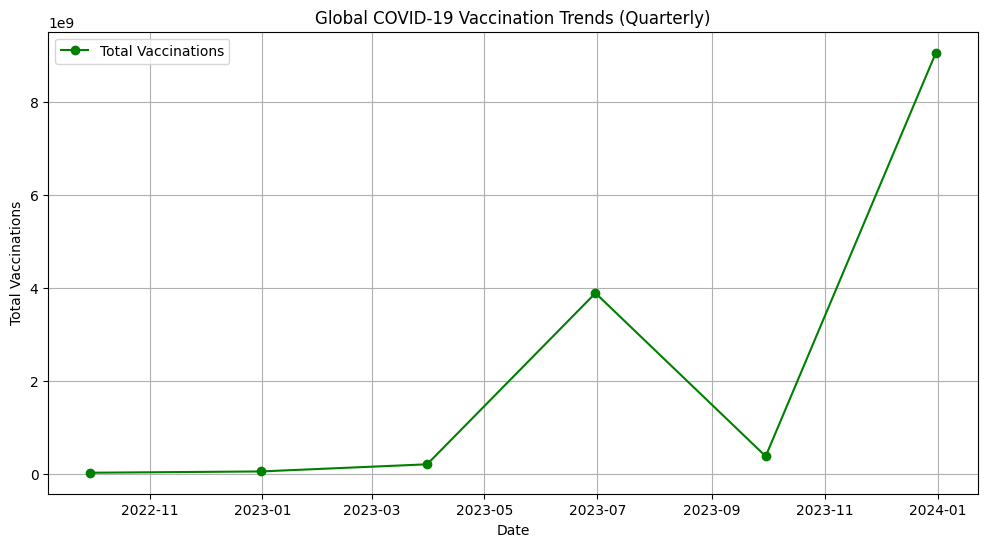

In [7]:
# 📌 Global Vaccination Trends
plt.figure(figsize=(12,6))
plt.plot(quarterly_data['DATE_UPDATED'], quarterly_data['TOTAL_VACCINATIONS'],
         label='Total Vaccinations', color='green', marker='o')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Global COVID-19 Vaccination Trends (Quarterly)')
plt.legend()
plt.grid()
plt.show()

Comparing World Health Organization (WHO) Regions' Vaccination Progress

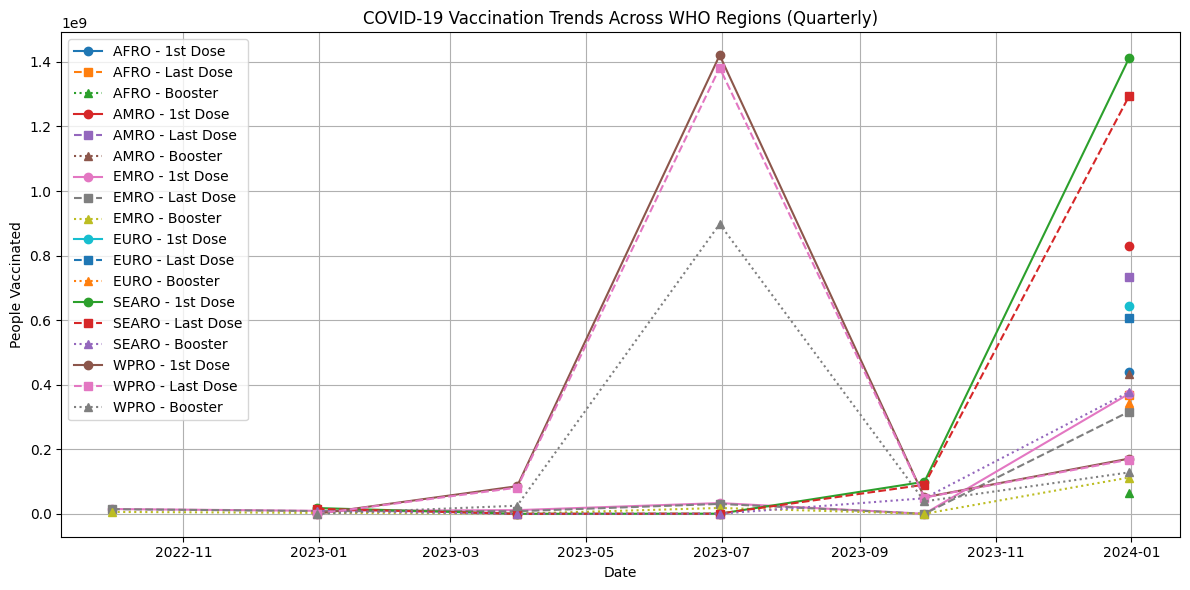

In [8]:
# WHO regions for analysis
regions = ['AFRO', 'AMRO', 'EMRO', 'EURO', 'SEARO', 'WPRO']

# Filter and resample region data
fig, ax = plt.subplots(figsize=(12,6))

for region in regions:
    region_trend = df[df['WHO_REGION'] == region].resample('QE').sum(numeric_only=True)

    # Plot different doses for each WHO region
    ax.plot(region_trend.index, region_trend['PERSONS_VACCINATED_1PLUS_DOSE'],
            label=f'{region} - 1st Dose', marker='o')
    ax.plot(region_trend.index, region_trend['PERSONS_LAST_DOSE'],
            linestyle='dashed', label=f'{region} - Last Dose', marker='s')
    ax.plot(region_trend.index, region_trend['PERSONS_BOOSTER_ADD_DOSE'],
            linestyle='dotted', label=f'{region} - Booster', marker='^')

# Labels and formatting
ax.set_xlabel('Date')
ax.set_ylabel('People Vaccinated')
ax.set_title('COVID-19 Vaccination Trends Across WHO Regions (Quarterly)')
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()


Global COVID-19 Vaccination Trends per 100 populations

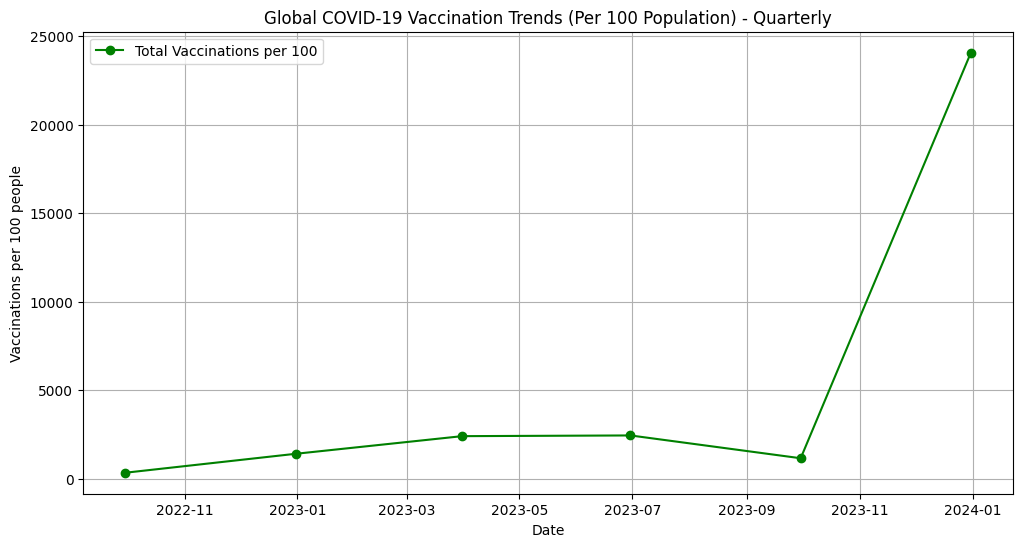

In [9]:
# Recalculate quarterly data
quarterly_data = df.resample('QE').sum(numeric_only=True).reset_index()

# Plotting per 100 metrics
plt.figure(figsize=(12,6))
plt.plot(quarterly_data['DATE_UPDATED'], quarterly_data['TOTAL_VACCINATIONS_PER100'],
         label='Total Vaccinations per 100', color='green', marker='o')
plt.xlabel('Date')
plt.ylabel('Vaccinations per 100 people')
plt.title('Global COVID-19 Vaccination Trends (Per 100 Population) - Quarterly')
plt.legend()
plt.grid()
plt.show()

 Compare Vaccine Types Used Across WHO Regions

<Figure size 1800x1000 with 0 Axes>

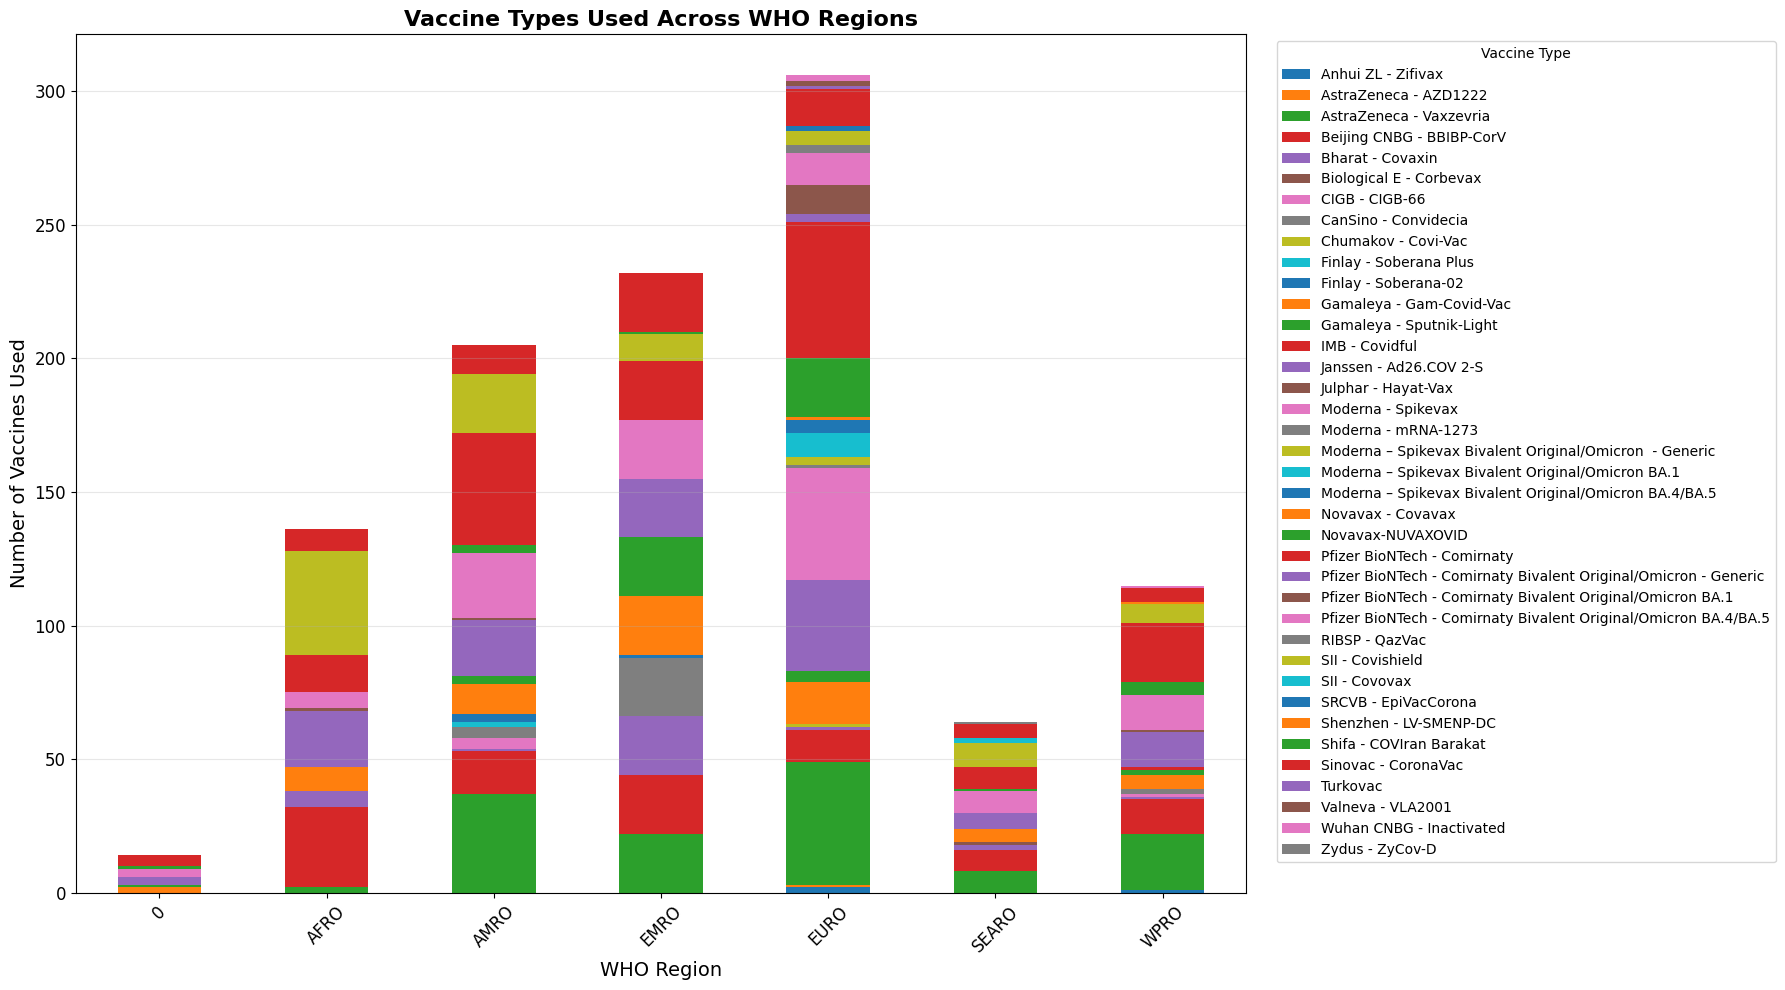

In [10]:
# Group data by WHO region and summarize vaccine usage
vaccine_distribution = vaccine_intro_df.groupby('WHO_REGION')['VACCINE_NAME'].value_counts().unstack().fillna(0)

# Create a much larger figure for better readability
plt.figure(figsize=(18, 10))  # Increased from (12,6) to (18,10)

# Plot the distribution of vaccine types by region
ax = vaccine_distribution.plot(kind='bar', stacked=True, figsize=(18, 10))

# Customize the plot for better readability
plt.xlabel('WHO Region', fontsize=14)
plt.ylabel('Number of Vaccines Used', fontsize=14)
plt.title('Vaccine Types Used Across WHO Regions', fontsize=16, fontweight='bold')

# Adjust legend positioning and size
plt.legend(title='Vaccine Type', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

Analyze Booster Dose Adoption Rates

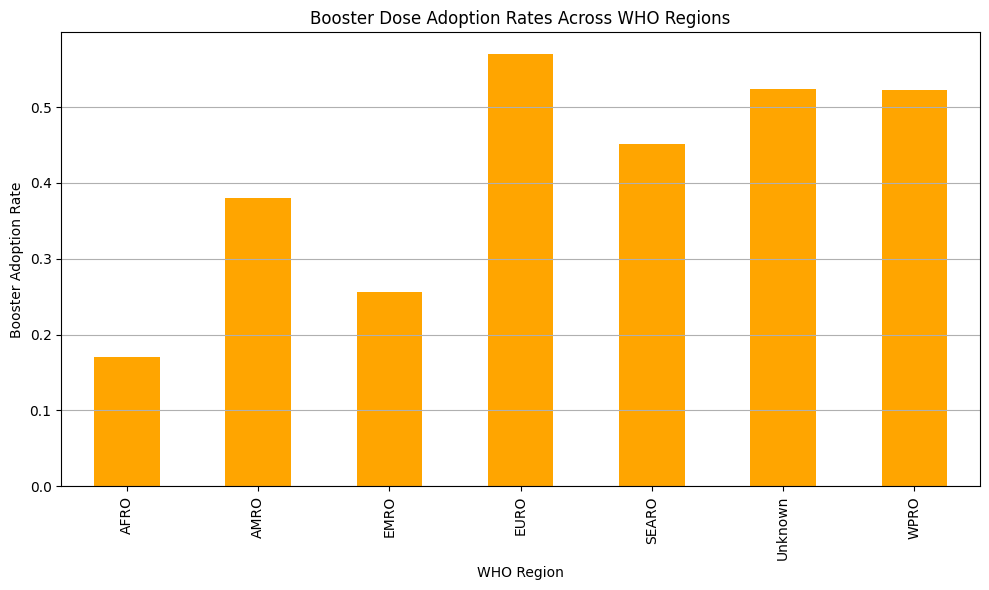

In [11]:
# Calculate booster dose adoption rates for WHO regions
df['BOOSTER_ADOPTION_RATE'] = df['PERSONS_BOOSTER_ADD_DOSE'] / df['PERSONS_VACCINATED_1PLUS_DOSE']

# Group by WHO region and analyze booster dose adoption rate
booster_adoption_rate_region = df.groupby('WHO_REGION')['BOOSTER_ADOPTION_RATE'].mean()

# Plotting booster adoption rates for each WHO region
booster_adoption_rate_region.plot(kind='bar', figsize=(10,6), color='orange')
plt.xlabel('WHO Region')
plt.ylabel('Booster Adoption Rate')
plt.title('Booster Dose Adoption Rates Across WHO Regions')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
